In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [15]:
path = "../data/train.csv"
data = pd.read_csv(path)

In [17]:
def impute_ames_data(data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()

    # 1. Drop weak columns
    drop_cols = ['Utilities', 'Condition2', 'RoofMatl']
    df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)

    # 2. Categorical: feature does not exist
    none_cols = [
        'Alley','MasVnrType',
        'BsmtQual','BsmtCond','BsmtExposure',
        'BsmtFinType1','BsmtFinType2',
        'FireplaceQu',
        'GarageType','GarageFinish','GarageQual','GarageCond',
        'PoolQC','Fence','MiscFeature'
    ]

    for col in none_cols:
        if col in df.columns:
            df[col] = df[col].fillna('None')

    # 3. Numeric: feature does not exist
    zero_cols = ['MasVnrArea', 'GarageYrBlt']
    for col in zero_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    # 4. LotFrontage: median by Neighborhood
    if 'LotFrontage' in df.columns and 'Neighborhood' in df.columns:
        df['LotFrontage'] = (
            df.groupby('Neighborhood')['LotFrontage']
              .transform(lambda x: x.fillna(x.median()))
        )

    # 5. Electrical: mode
    if 'Electrical' in df.columns:
        df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    return df

In [18]:
data = impute_ames_data(data)

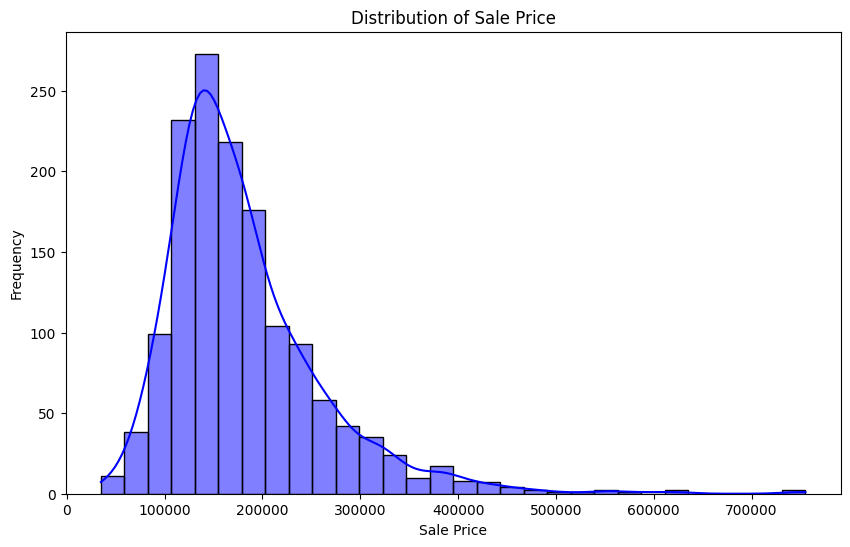

In [19]:
# check sale price distribution
plt.figure(figsize=(10,6))
sns.histplot(data["SalePrice"], bins = 30, color='blue', kde=True)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

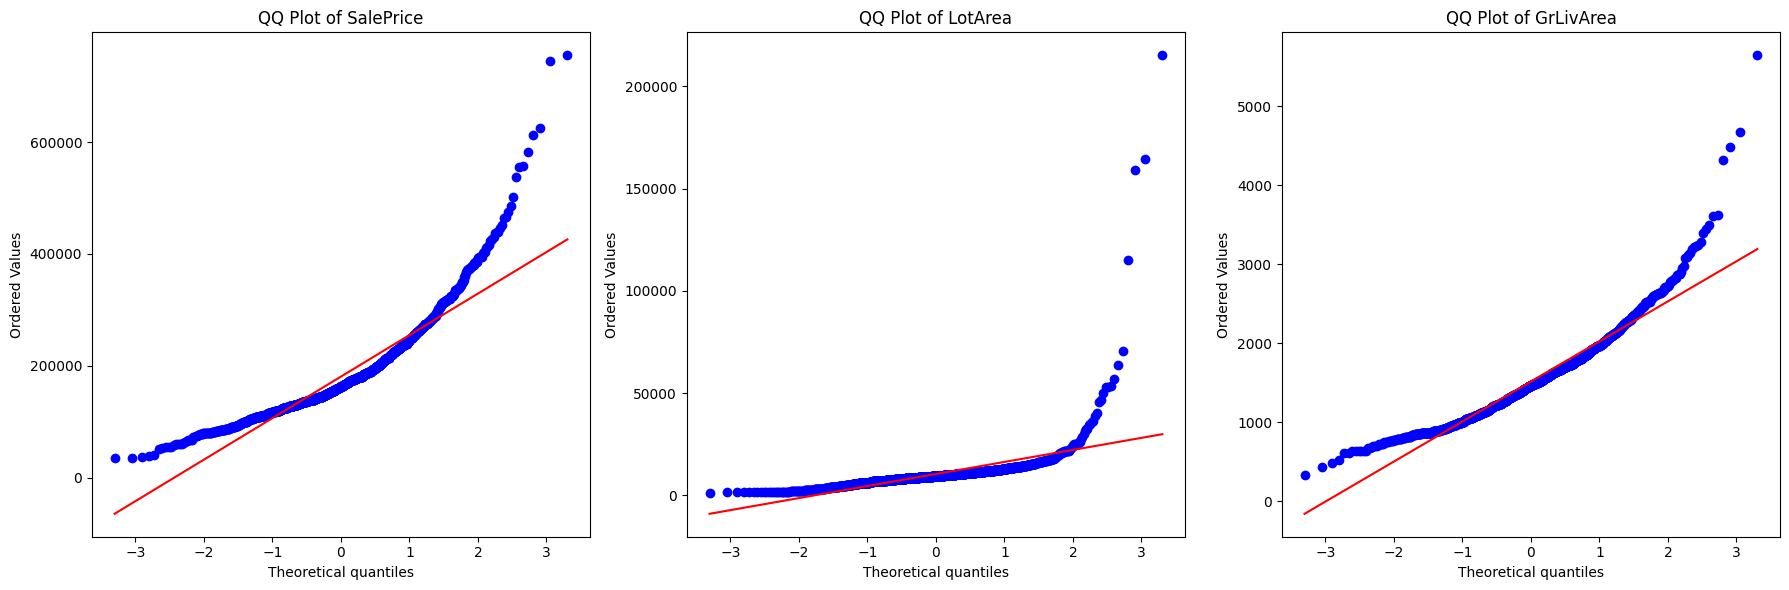

In [20]:
# QQ plot for sale price, LotArea, GrLivArea
import scipy.stats as stats
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
stats.probplot(data["SalePrice"], dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot of SalePrice")
stats.probplot(data["LotArea"], dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot of LotArea")
stats.probplot(data["GrLivArea"], dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot of GrLivArea")
plt.tight_layout()
plt.show()

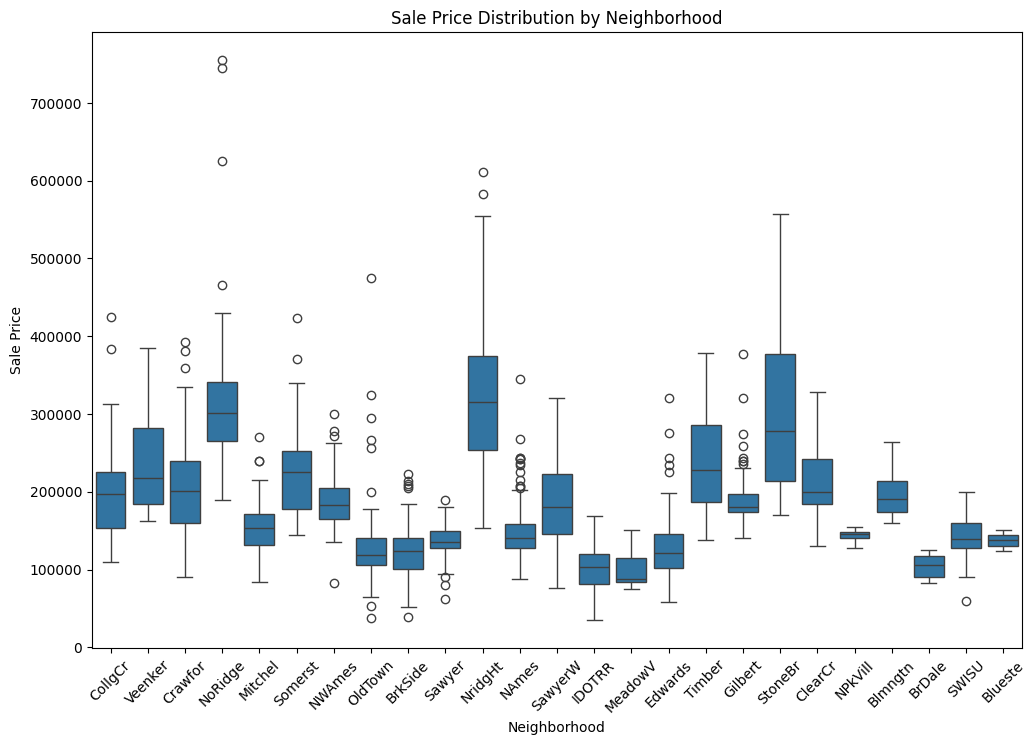

In [21]:
# Neighborhood price dispersion
plt.figure(figsize=(12, 8))
sns.boxplot(x = "Neighborhood", y = "SalePrice", data = data)
plt.title("Sale Price Distribution by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.show()